<a href="https://colab.research.google.com/github/VitorMello-7/Cereal80/blob/main/cereal80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importando os dados e as bibliotecas**

In [ ]:
import pandas as pd
import io
import matplotlib as plt
import seaborn as sns
import math

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving cereal.csv to cereal (1).csv


#**Limpando os dados**

In [ ]:
cereais = pd.read_csv(io.BytesIO(uploaded['cereal.csv']))
cereais['rating;;'] = cereais['rating;;'].str.replace(';','')

In [ ]:
cereais.rename(columns = {'rating;;':'ratings'}, inplace = True)

In [ ]:
cereais['ratings'] = pd.to_numeric(cereais['ratings'])

In [ ]:
cereais.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,ratings
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
cereais.shape

(77, 16)

#**Analisando os dados por fábrica**

In [ ]:
cereais['mfr'].unique()  #Cada fabricante de cereal é representada por uma letra diferente (Para mais informações ler o Read.me) 

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [ ]:
cereais['mfr'].value_counts()

K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: mfr, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


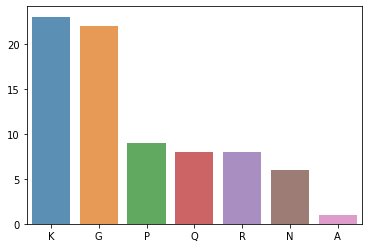

In [ ]:
fabricantes = cereais['mfr'].value_counts()
sns.barplot(fabricantes.index, fabricantes.values, alpha=0.8)

#**Analisando as formas de consumir**

In [ ]:
cereais.type.value_counts() #type são as formas de comer o cereal 

C    74
H     3
Name: type, dtype: int64

In [ ]:
cereais.query('type == "H"')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,ratings
20,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.0,1.00,64.533816
43,Maypo,A,H,100,4,1,0,0.0,16.0,3,95,25,2,1.0,1.00,54.850917
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


#**Analisando as calorias**

In [ ]:
cereais.calories.mean()

106.88311688311688

In [ ]:
cereais.calories.median()

110.0

In [ ]:
cereais.calories.describe()

count     77.000000
mean     106.883117
std       19.484119
min       50.000000
25%      100.000000
50%      110.000000
75%      110.000000
max      160.000000
Name: calories, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


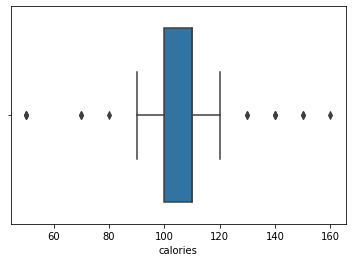

In [ ]:
sns.boxplot(cereais.calories)

In [ ]:
cereais.calories.nlargest()

46    160
44    150
45    150
39    140
49    140
Name: calories, dtype: int64

In [ ]:
cereais.calories.nsmallest()

3     50
54    50
55    50
0     70
2     70
Name: calories, dtype: int64

In [ ]:
cereais.query('mfr == "K"').calories.mean()

108.69565217391305

In [ ]:
media_calorica_por_fabrica = cereais.groupby("mfr").calories.mean()
print(media_calorica_por_fabrica)

mfr
A    100.000000
G    111.363636
K    108.695652
N     86.666667
P    108.888889
Q     95.000000
R    115.000000
Name: calories, dtype: float64


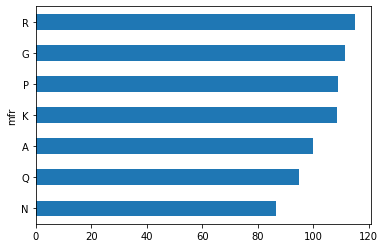

In [ ]:
media_calorica_por_fabrica.sort_values().plot(kind = "barh")

#**Analisando as notas**

In [ ]:
round_ratings = cereais['ratings'].round(decimals = 1) #Decidi diminuir o número de casas decimais para melhor visualização
print(round_ratings)

0     68.4
1     34.0
2     59.4
3     93.7
4     34.4
      ... 
72    39.1
73    27.8
74    49.8
75    51.6
76    36.2
Name: ratings, Length: 77, dtype: float64


In [ ]:
round_ratings.describe()

count    77.000000
mean     42.661039
std      14.048807
min      18.000000
25%      33.200000
50%      40.400000
75%      50.800000
max      93.700000
Name: ratings, dtype: float64

In [ ]:
round_ratings.nlargest()

3     93.7
64    74.5
65    72.8
0     68.4
63    68.2
Name: ratings, dtype: float64

In [ ]:
round_ratings.nsmallest()

10    18.0
12    19.8
35    21.9
18    22.4
14    22.7
Name: ratings, dtype: float64

#**Analisando as notas por fábrica**

In [ ]:
nota_media_por_fabrica = cereais.groupby('mfr').ratings.mean()
print(nota_media_por_fabrica)

mfr
A    54.850917
G    34.485852
K    44.038462
N    67.968567
P    41.705744
Q    42.915990
R    41.542997
Name: ratings, dtype: float64


In [ ]:
notas_fabricas = nota_media_por_fabrica.to_frame().reset_index()
notas_fabricas.columns = ["fabricas", "media_de_notas"]
print(notas_fabricas)

  fabricas  media_de_notas
0        A       54.850917
1        G       34.485852
2        K       44.038462
3        N       67.968567
4        P       41.705744
5        Q       42.915990
6        R       41.542997


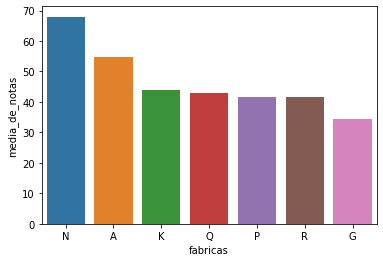

In [ ]:
sns.barplot(x = "fabricas", y = "media_de_notas", data = notas_fabricas.sort_values("media_de_notas", ascending= False))